# TensorFlow

tensorflow는 구글이 개발한 Machine Learning Framework입니다. 

Tensor(여러 방향을 가진 벡터, 다차원 벡터 데이터) + Flow(데이터의 흐름) 

간단한 프로그램을 작성하는 것과 달리 인공지능 모델은 복잡하기 때문에 모든 코드를 직접 코딩하기 어렵습니다.

그렇기에 TenrsorFlow를 사용합니다.

# Keras

keras는 python으로 작성된 오픈소스 신경망 라이브러리입니다. TensorFlow, CNTK, or Theano 위에서 수행가능합니다. 

최근에 tensorflow와 합쳐졌습니다.

# 순서
## 1. Anaconda 설치
## 2. TensorFlow 설치

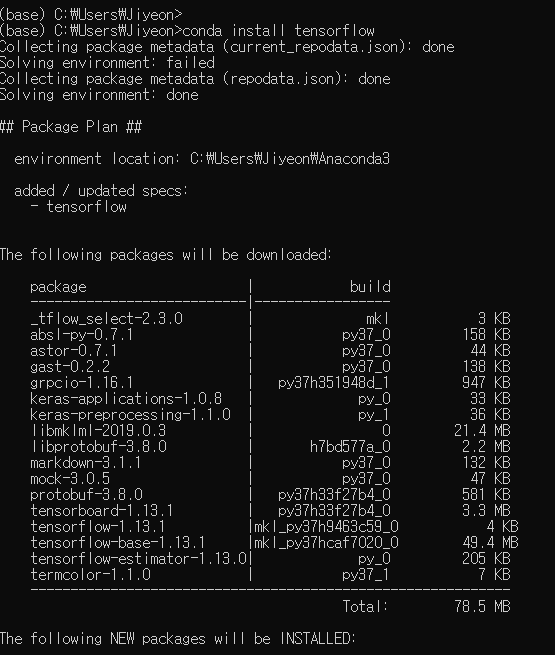

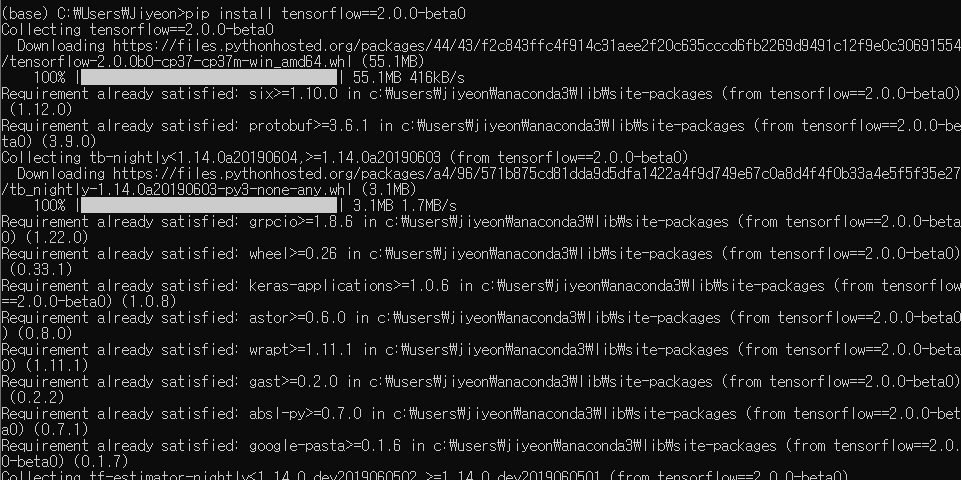

In [12]:
# __future__은 python 2와 3의 버전 차이로 인해 생기는 문제를 방지하고 호환이 되도록 하기 위해 사용합니다.
# print_function은 원하는 출력을 가능하게끔
# division python3스타일의 나누기 지원
# absolute import 표준 모듈과 동일한 이름의 로컬 모듈을 사용 가능하게 해줌
# 인용된 문자열은 바이트가 아닌 유니코드 시퀀스입니다.
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow & tf.keras import
import tensorflow as tf
from tensorflow import keras

# helper import
import numpy as np
import matplotlib.pyplot as plt

# tf -> tensorflow버전을 확인합니다.
print(tf.__version__)

1.13.1


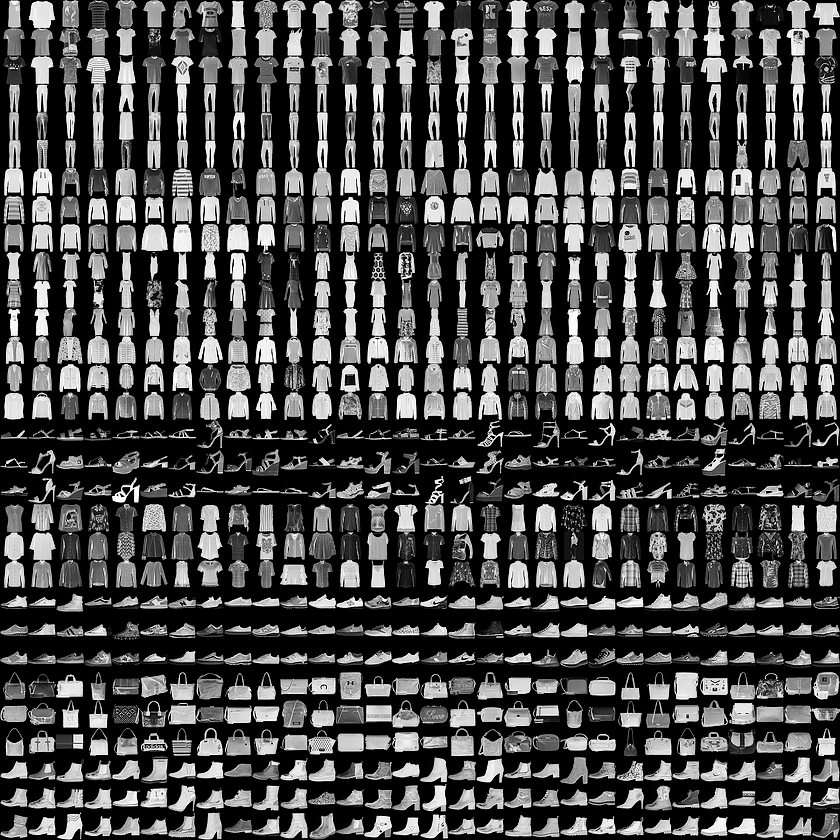

In [ ]:
# fashion_mnist data set import
fashion_mnist = keras.datasets.fashion_mnist

# load_data() 함수를 호출하면 네 개의 넘파이(NumPy) 배열이 반환됩니다.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

16384/29515 [===============>..............] - ETA: 0s

In [159]:
train_images

#train_labels

#test_images

#test_labels

#fashion_mnist

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

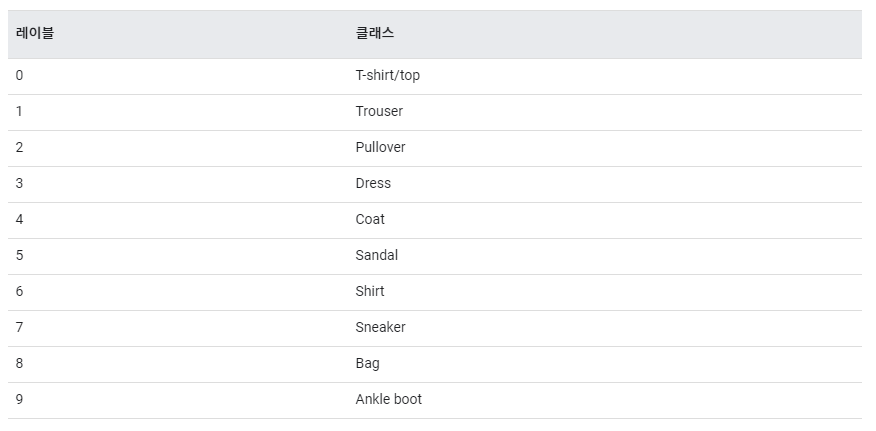

In [131]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색

In [132]:
train_images.shape

(60000, 28, 28)

In [133]:
len(train_labels)

60000

In [156]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [134]:
test_images.shape

(10000, 28, 28)

In [135]:
len(test_labels)

10000

# 데이터 전처리

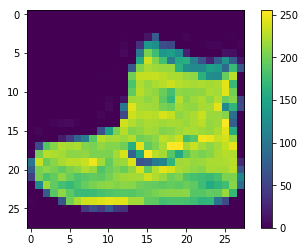

In [136]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [137]:
train_images = train_images / 255.0

test_images = test_images / 255.0

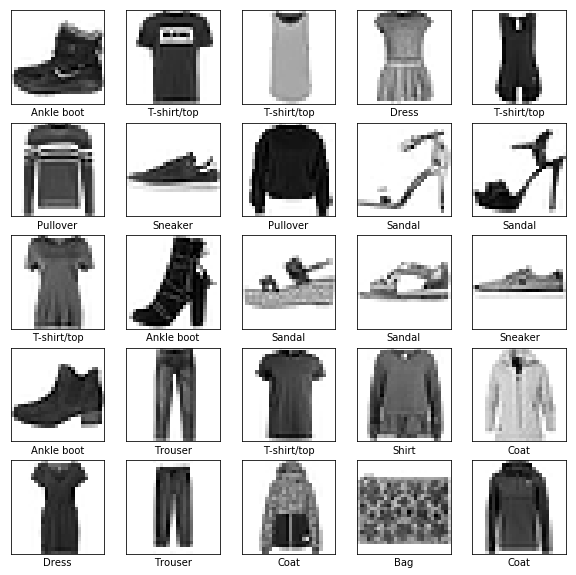

In [138]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

## - 층 설정

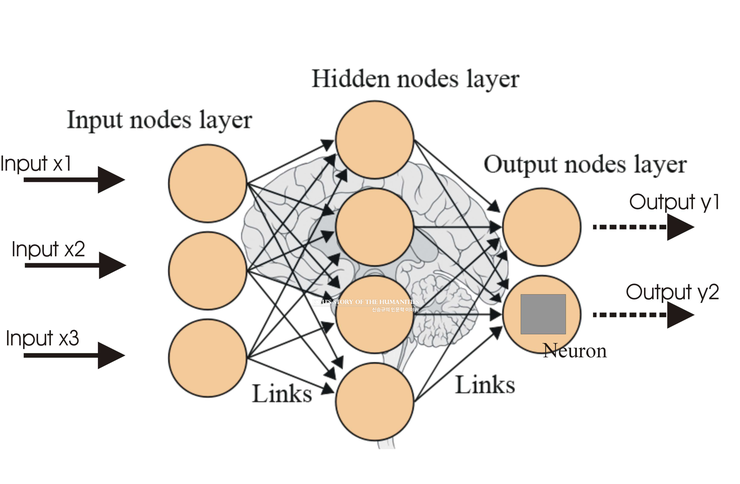

In [139]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

ReLU는 backpropagation이 진행될수록 전달 값들이 점점 희미해 지는 현상인 Vanishing Gradient를 없애기 위한 activation function입니다.

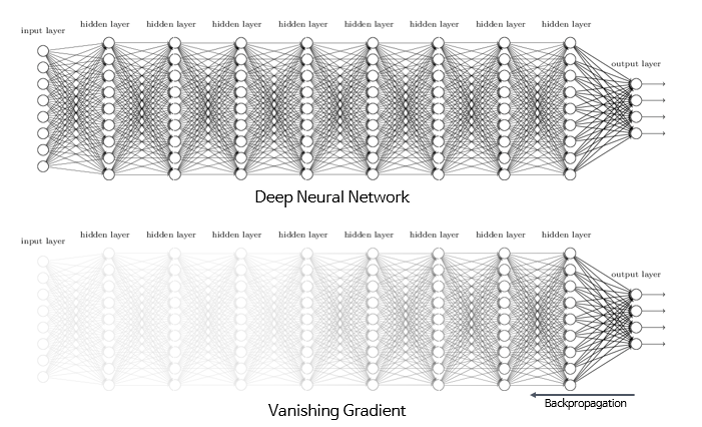

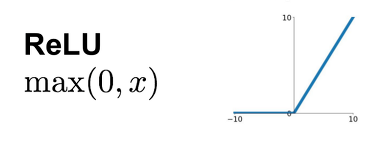

Softmax

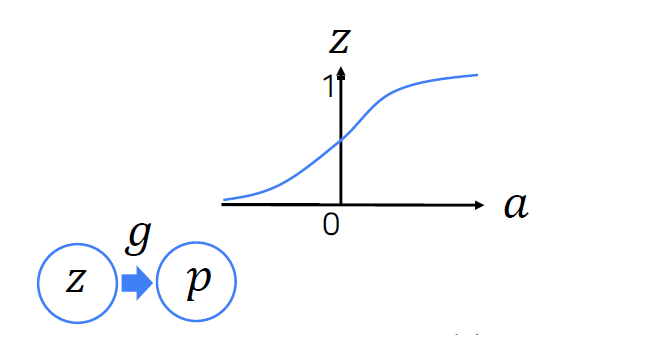

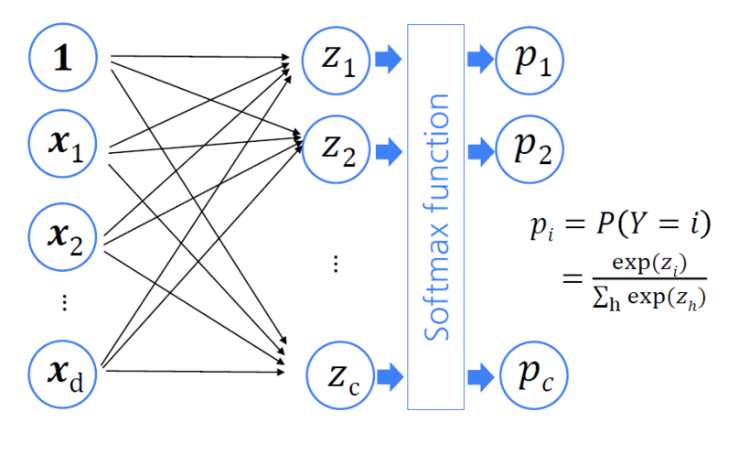

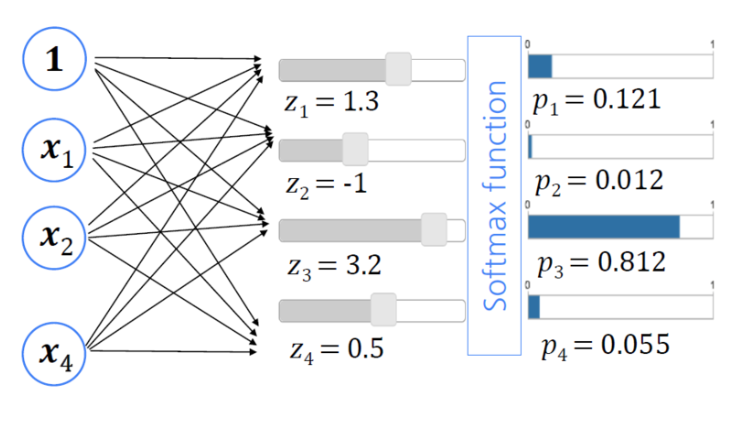

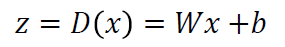

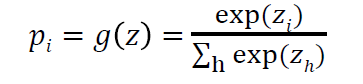

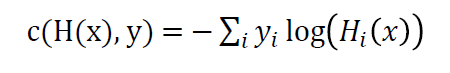

## - 모델 컴파일

Optimizer - 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.

Loss function - 훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.

Metrics - 훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

Adam은 Optimizer의 한 방법으로 stepsize가 gradient의 rescaling에 영향 받지 않습니다. 

gradient가 커져도 stepsize는 bound되어 있어서 어떠한 objective function을 사용한다 하더라도 안정적으로 최적화를 위한 하강이 가능합니다.

In [140]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련

In [141]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4989 - accuracy: 0.8251
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3782 - accuracy: 0.8630
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3378 - accuracy: 0.8767
Epoch 4/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3136 - accuracy: 0.8845
Epoch 5/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2960 - accuracy: 0.8903


# 정확도 평가

In [142]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('테스트 정확도:', test_acc) 

10000/10000 [==============================] - 0s 23us/sample - loss: 0.3584 - accuracy: 0.8733
테스트 정확도: 0.8733


# 예측 만들기

In [143]:
predictions = model.predict(test_images)

In [144]:
predictions[0]

array([9.7274494e-07, 9.0098391e-09, 3.3551825e-07, 1.9802054e-07,
       2.1549977e-07, 3.6894612e-02, 9.5482676e-07, 1.0791940e-01,
       5.6957277e-05, 8.5512632e-01], dtype=float32)

In [145]:
np.argmax(predictions[0])

9

In [146]:
test_labels[0]

9

In [147]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

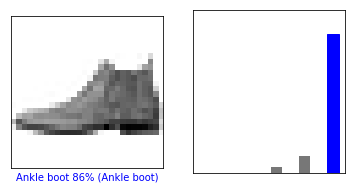

In [148]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

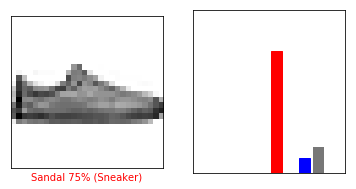

In [149]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

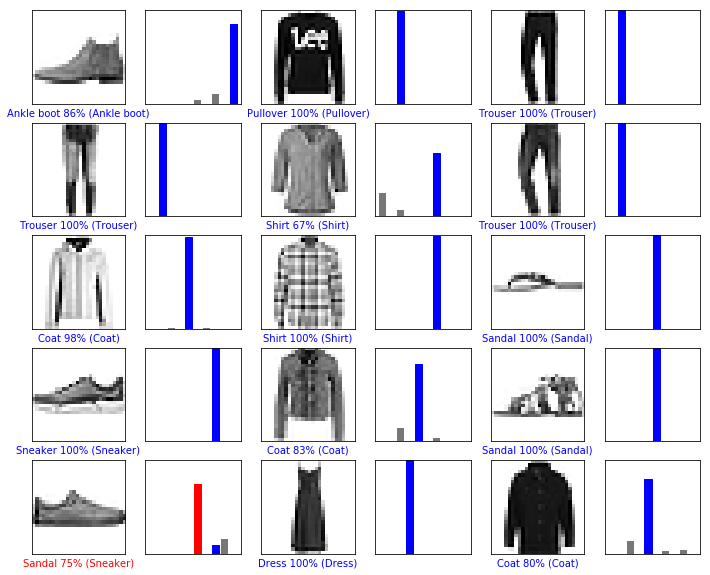

In [150]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [151]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)            

(28, 28)


In [ ]:
# 이미지 하나만 사용할 때도 batch에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)        

In [153]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.7274403e-07 9.0098231e-09 3.3551800e-07 1.9802077e-07 2.1549938e-07
  3.6894627e-02 9.5482608e-07 1.0791932e-01 5.6957229e-05 8.5512644e-01]]


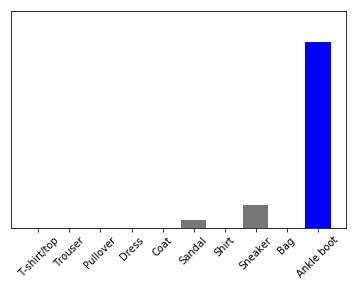

In [154]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show() 

In [155]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
